In [7]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [8]:
!unzip /content/drive/MyDrive/CNN/Flowers-Dataset.zip

unzip:  cannot find or open /content/drive/MyDrive/CNN/Flowers-Dataset.zip, /content/drive/MyDrive/CNN/Flowers-Dataset.zip.zip or /content/drive/MyDrive/CNN/Flowers-Dataset.zip.ZIP.


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
flowers_datagen = ImageDataGenerator(rescale= 1./225,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [6]:
flowers_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
a_flowers = flowers_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(256, 256),
                                                class_mode='categorical', batch_size=32)

Found 4317 images belonging to 5 classes.


Creat Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [13]:
model = Sequential()

In [14]:
model.add(Convolution2D(32,(3,3),activation = "relu",input_shape = (256,256,3)))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(300, activation = "relu"))

In [18]:
model.add(Dense(300, activation = "relu"))

In [19]:
model.add(Dense(5,activation="softmax"))

In [20]:
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [21]:
len(a_flowers)

135

In [22]:
model.fit(a_flowers, epochs= 3,validation_data=a_flowers, steps_per_epoch=len(a_flowers),validation_steps=len(a_flowers) )

Epoch 1/3
135/135 [==============================] - 414s 3s/step - loss: 4.6224 - accuracy: 0.4327 - val_loss: 1.0030 - val_accuracy: 0.6250
Epoch 2/3
135/135 [==============================] - 465s 3s/step - loss: 0.9196 - accuracy: 0.6498 - val_loss: 0.5266 - val_accuracy: 0.8436
Epoch 3/3
135/135 [==============================] - 466s 3s/step - loss: 0.4679 - accuracy: 0.8399 - val_loss: 0.2180 - val_accuracy: 0.9578


In [23]:
model.save("flowers.h5")

In [ ]:
#Testing the Model

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [25]:
model = load_model("/content/drive/MyDrive/CNN/flowers.h5")

In [27]:
img = image.load_img("/content/drive/MyDrive/CNN/flowers/rose/5060536705_b370a5c543_n.jpg",target_size=(256,256))

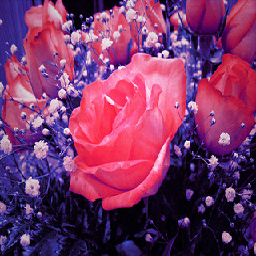

In [28]:
img

In [29]:
x = image.img_to_array(img)

In [30]:
x

array([[[ 42.,  29., 111.],
        [ 38.,  28.,  78.],
        [ 43.,  25., 101.],
        ...,
        [141.,  61., 120.],
        [145.,  57., 117.],
        [142.,  52., 113.]],

       [[ 47.,  29., 115.],
        [ 45.,  30.,  89.],
        [ 48.,  25., 107.],
        ...,
        [162.,  65., 108.],
        [163.,  57., 103.],
        [162.,  55.,  99.]],

       [[ 51.,  27., 115.],
        [ 51.,  29., 104.],
        [ 53.,  25., 112.],
        ...,
        [177.,  73., 108.],
        [173.,  59.,  95.],
        [171.,  55.,  92.]],

       ...,

       [[ 43.,  22.,  65.],
        [ 13.,   3.,   4.],
        [ 52.,  32., 129.],
        ...,
        [  8.,   1.,   8.],
        [ 57.,  32., 116.],
        [111.,  79., 164.]],

       [[ 12.,   0.,  19.],
        [  8.,   0.,  18.],
        [ 31.,  17.,  68.],
        ...,
        [ 12.,   1.,   9.],
        [ 11.,   9.,  12.],
        [ 48.,  22., 119.]],

       [[ 19.,  10.,  37.],
        [ 21.,  18.,  35.],
        [ 21.,  

In [31]:
x.ndim

3

In [32]:
x = np.expand_dims(x,axis= 0)

In [33]:
x.ndim

4

In [34]:
pred = model.predict(x)

In [35]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [36]:
hi = ["daisy","dandelion","rose","sunflower","tulip"]

In [37]:
np.argmax(pred)

2

In [38]:
hi[np.argmax(pred)]

'rose'